Data Science in production assignment

House Prices - Advanced Regression Techniques

In [101]:
import sklearn 
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

Original Data set

In [102]:
def read_csv(file_path):
    dataset_raw = pd.read_csv(file_path, index_col=0)
    return dataset_raw

In [103]:
file_path = '../data/house-prices-advanced-regression-techniques/train.csv'
dataset_raw = pd.read_csv(file_path, index_col=0)
dataset_raw.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Data Exploration

Descriptive statistics of a Data set

In [104]:
dataset_raw.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Data set types

In [105]:
dataset_raw.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

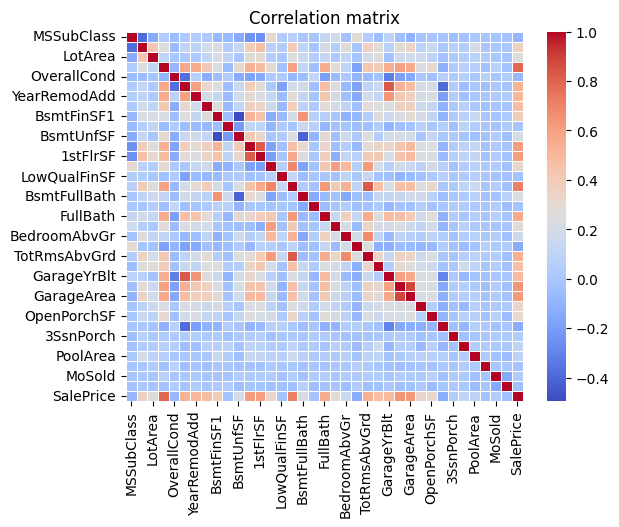

In [106]:
numeric_features = dataset_raw.select_dtypes(include=[np.number])

corr = numeric_features.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show() 

Data Preprocessing

In [107]:
features = ['MSSubClass', 'LotArea', 'Street', 'LotShape']
X = dataset_raw[features]
y = dataset_raw['SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [108]:
categorical_columns = ['LotShape' , 'Street']
numerical_columns = ['LotArea', 'MSSubClass']

Pre-processing

In [109]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

Transformer

In [110]:
numeric_transformer.fit(X_train[numerical_columns])
categorical_transformer.fit(X_train[categorical_columns])



Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [111]:
X_train_numeric = numeric_transformer.transform(X_train[numerical_columns])
X_train_categorical = categorical_transformer.transform(X_train[categorical_columns])
X_train = np.concatenate([X_train_numeric, X_train_categorical.toarray()], axis=1)

Model Training


In [112]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

object persistance

In [113]:
models_folder = '../models/'

In [114]:
joblib.dump(model, models_folder + 'model.joblib')

['../models/model.joblib']

In [115]:
joblib.dump(categorical_transformer, models_folder + 'categorical_encoder.joblib')

['../models/categorical_encoder.joblib']

In [116]:
joblib.dump(numeric_transformer, models_folder + 'numerical_scaler.joblib')

['../models/numerical_scaler.joblib']

In [117]:
loaded_model = joblib.load(models_folder + 'model.joblib')

In [118]:
# Load encoder
loaded_categorical_encoder = joblib.load(models_folder + 'categorical_encoder.joblib')
 
# Load scaler
loaded_numerical_scaler = joblib.load(models_folder + 'numerical_scaler.joblib')

Model Evalutaion

In [119]:
# Model evaluation
X_test_numeric = loaded_numerical_scaler.transform(X_test[numerical_columns])
X_test_categorical = loaded_categorical_encoder.transform(X_test[categorical_columns])
X_test_final = np.concatenate([X_test_numeric, X_test_categorical.toarray()], axis=1)


def compute_rmsle(y_test: np.ndarray, y_pred: np.ndarray, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)
 
# Predict house prices
predictions = loaded_model.predict(X_test_final)
 
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

# Calculate RMSLE
rmsle = compute_rmsle(y_test, predictions)
print(f"RMSLE: {rmsle}")

RMSE: 77858.47412371206
RMSLE: 0.39


Model inference

In [120]:
file_path = '../data/house-prices-advanced-regression-techniques/test.csv'
dataset_raw = pd.read_csv(file_path, index_col=0)
dataset_raw.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [121]:
df = dataset_raw[features]

categorical_columns = ['LotShape' , 'Street']
numerical_columns = ['LotArea', 'MSSubClass']

In [122]:
null_values = df[['LotShape', 'Street', 'LotArea', 'MSSubClass']].isnull().sum()

print("Null values in specified columns:")
print(null_values)

df['LotArea'].fillna(df['LotArea'].mean(), inplace=True)
df['MSSubClass'].fillna(df['MSSubClass'].mean(), inplace=True)

# For categorical columns, you might choose to fill null values with a specific category
df['LotShape'].fillna('Unknown', inplace=True)
df['Street'].fillna('Unknown', inplace=True)

dataframe = df

Null values in specified columns:
LotShape      0
Street        0
LotArea       0
MSSubClass    0
dtype: int64


/var/folders/lv/wyg6z79s3zq9v2mg63nwkrkm0000gn/T/ipykernel_37355/2080223734.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotArea'].fillna(df['LotArea'].mean(), inplace=True)
/var/folders/lv/wyg6z79s3zq9v2mg63nwkrkm0000gn/T/ipykernel_37355/2080223734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LotArea'].fillna(df['LotArea

In [123]:
# Load encoder
categorical_encoder_test = joblib.load(models_folder + 'categorical_encoder.joblib')
 
# Load scaler
numerical_scaler_test = joblib.load(models_folder + 'numerical_scaler.joblib')

In [124]:
dataset_test_encoder_numeric = numerical_scaler_test.transform(dataframe[numerical_columns])
dataset_test_encoder_categorical = categorical_encoder_test.transform(dataframe[categorical_columns])


X_train = np.concatenate([dataset_test_encoder_numeric, dataset_test_encoder_categorical.toarray()], axis=1)

In [125]:
loaded_model = joblib.load(models_folder + 'model.joblib')

In [127]:

# Predict house prices
predictions = loaded_model.predict(X_train)
predictions
 


array([173836.06701034, 209663.05184421, 206301.67733734, ...,
       188117.68798779, 167571.1528115 , 167818.83603619])